#    Fourier
 
 
 

In [1]:
import mediapipe as mp

In [2]:
#!/usr/bin/env python
'''
Sreenivas Bhattiprolu
https://www.youtube.com/watch?v=Wka_XhcZAcQ
https://github.com/bnsreenu/python_for_microscopists/blob/master/106_image_filters_using_fourier_transform_DFT.py
'''

'\nSreenivas Bhattiprolu\nhttps://www.youtube.com/watch?v=Wka_XhcZAcQ\nhttps://github.com/bnsreenu/python_for_microscopists/blob/master/106_image_filters_using_fourier_transform_DFT.py\n'

In [3]:
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Minico

In [ ]:
usr1 ="rockman"
usr2 ="gilfm"
BASE_FOLDER = 'C:/Users/'+usr1 +'/Pictures/Saved Pictures/'
img_name = "lena.png"
path = BASE_FOLDER + img_name

imgorg = cv2.imread(path)
img = cv2.imread(path, 0)

plt.imshow("d",img)
plt.show()

In [52]:
 

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

#FFT of image
##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log.
#So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


In [7]:


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)#Center point

mask = np.ones((rows, cols, 2), np.uint8)#Crate mask fo 2 channels

r = 80 # Radius of circular mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] =  0.9


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.


# apply mask and inverse DFT
fshift = dft_shift * mask 

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)#Unshift the privous  shift
img_back = cv2.idft(f_ishift)# Inverse   fourier
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(imgorg )
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_back, cmap='gray')
ax5.title.set_text('After inverse FFT')
plt.show()

plt.imshow(img_back)
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [64]:
fshift.shape



(512, 512, 2)

In [6]:
img_float32 = np.float32(img)


In [7]:
#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)
#print(dft_shift.shape)
#Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log.
#So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
             

In [8]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

In [9]:
# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#

# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

 


C:\Users\rockman\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [12]:
cv2.imshow(fshift_mask_mag , img)   
cv2.waitKey(0)
cv2.destroyAllWindows()
fshift_mask_mag 

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'winname'

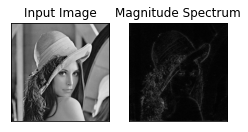

In [10]:
# apply mask and inverse DFT

 
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
 
plt.show()   

In [30]:

#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

In [ ]:
 
##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log.
#So we can add 1 to the array to avoid seeing a warning.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [ ]:
 
    # Circular HPF mask, center circle is 0, remaining all ones
    #Can be used for edge detection because low frequencies at center are blocked
    #and only high frequencies are allowed. Edges are high frequency components.
    #Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

In [ ]:
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
# mask_area is a matrix size rowsxcols] each cell True/False
mask[mask_area] = 0

In [ ]:
mask_area[25,25]


In [ ]:
 # apply mask and inverse DFT
    fshift = dft_shift * mask

    fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

In [ ]:

    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img1)
    ax1.title.set_text('Input Image')
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(magnitude_spectrum, cmap='gray')
    ax2.title.set_text('FFT of image')
    ax3 = fig.add_subplot(2,2,3)
    ax3.imshow(fshift_mask_mag, cmap='gray')
    ax3.title.set_text('FFT + Mask')
    ax4 = fig.add_subplot(2,2,4)
    ax4.imshow(img_back, cmap='gray')
    ax4.title.set_text('After inverse FFT')
    plt.show()